In [1]:
import numpy as np
import pandas as pd
import os
from glob import glob
from pprint import pprint
import json
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.pyplot as plt

import cellcycle.PlottingTools as plottingTools
from cellcycle.ParameterSet import ParameterSet
import cellcycle.DataStorage as dataStorage
import cellcycle.DataAnalysis as dataAnalysis
import cellcycle.MakeDataframe as makeDataframe
from cellcycle import mainClass

In [12]:
replication_speed = 'infinite' # options 'finite' or 'infinite'

In [13]:
file_path_input_params_json = '../../input_params.json'
input_param_dict = mainClass.extract_variables_from_input_params_json(file_path_input_params_json)
root_path = input_param_dict["DATA_FOLDER_PATH"]
simulation_location = 'SI/S1_gene_expr_ribo/'+replication_speed
file_path = os.path.join(root_path, simulation_location)
print('file_path', file_path)
parameter_path = os.path.join(file_path, 'parameter_set.csv')
print('parameter_path', parameter_path)

pinkish_red = (247 / 255, 109 / 255, 109 / 255)
green = (0 / 255, 133 / 255, 86 / 255)
dark_blue = (36 / 255, 49 / 255, 94 / 255)
light_blue = (168 / 255, 209 / 255, 231 / 255)
blue = (55 / 255, 71 / 255, 133 / 255)
yellow = (247 / 255, 233 / 255, 160 / 255)
dark_yellow = (235 / 255, 201 / 255, 27 / 255)
print(file_path)

file_path /home/berger/Data/UltrasensitivityCombined/Final_NatCom_Submission/SI/S1_gene_expr_ribo/infinite
parameter_path /home/berger/Data/UltrasensitivityCombined/Final_NatCom_Submission/SI/S1_gene_expr_ribo/infinite/parameter_set.csv
/home/berger/Data/UltrasensitivityCombined/Final_NatCom_Submission/SI/S1_gene_expr_ribo/infinite


# Make data frame from time traces

In [14]:
data_frame = makeDataframe.make_dataframe(file_path)
time_traces_data_frame = pd.read_hdf(data_frame['path_dataset'].iloc[0], key='dataset_time_traces')

v_init_data_frame = pd.read_hdf(data_frame['path_dataset'].iloc[0], key='dataset_init_events')
v_init = v_init_data_frame.iloc[3]['v_init']
t_init_list = v_init_data_frame['t_init'].to_numpy()
print(t_init_list)

v_d_data_frame = pd.read_hdf(data_frame['path_dataset'].iloc[0], key='dataset_div_events')
t_div_list = v_d_data_frame['t_d'].to_numpy()

['/home/berger/Data/UltrasensitivityCombined/Final_NatCom_Submission/SI/S1_gene_expr_ribo/infinite/S2A_ribo_constit',
 '/home/berger/Data/UltrasensitivityCombined/Final_NatCom_Submission/SI/S1_gene_expr_ribo/infinite/FigS1_constit_infinite.pdf']
[ 6.68   8.68  10.681 12.681 14.681 16.682 18.682]


In [15]:
time = np.array(time_traces_data_frame["time"])
volume = np.array(time_traces_data_frame["volume"])
n_ori = np.array(time_traces_data_frame["n_ori"])
n_p = np.array(time_traces_data_frame["N_init"])
n_s = np.array(time_traces_data_frame["sites_total"])
length_total = np.array(time_traces_data_frame["length_total"])
total_conc = n_p / volume
free_conc = np.array(time_traces_data_frame["free_conc"])
print(time.size)
t_0 = time[volume==v_d_data_frame['v_b'][2]]
indx_0 = np.where(time==t_0)[0][0]
t_f = time[volume==v_d_data_frame['v_b'][5]]
indx_f = np.where(time==t_f)[0][0]+20

print(indx_0, indx_f)
print(t_0, t_f)

n_ori_cut = n_ori[indx_0:indx_f]
length_total_cut = length_total[indx_0:indx_f]
time_cut = time[indx_0:indx_f]
volume_cut = volume[indx_0:indx_f]
n_ori_density_cut = n_ori_cut / volume_cut
n_p_cut = n_p[indx_0:indx_f]
n_s_cut = n_s[indx_0:indx_f]
total_conc_cut = total_conc[indx_0:indx_f]
free_conc_cut = free_conc[indx_0:indx_f]
t_init_list_cut_1 = t_init_list[t_init_list>t_0]
t_init_list_cut = t_init_list_cut_1[t_init_list_cut_1<t_f]
t_div_list_cut_1 = t_div_list[t_div_list>t_0]
t_div_list_cut = t_div_list_cut_1[t_div_list_cut_1<=t_f]

print(t_div_list, t_div_list_cut)

20000
11683 17704
[11.683] [17.684]
[ 9.682 11.683 13.683 15.683 17.684 19.684] [13.683 15.683 17.684]


# Plot three figures

2.0 11.683 14.568390081777927


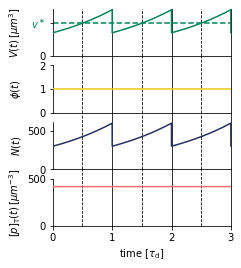

In [16]:
x_axes_list = [time_cut, time_cut, time_cut, time_cut]
if replication_speed == 'finite':
        phi = n_ori_cut/length_total_cut
else:
    phi = np.ones(volume_cut.size)
label = r'$\phi(t)$'
y_axes_list = [volume_cut, phi, n_p_cut, total_conc_cut, free_conc_cut]
color_list = [green, dark_yellow, dark_blue, pinkish_red]
y_min_list = [0,0,0,0]
y_max_list = [1, 1.2, 1.2, 1.2]
label_list = [r'$V(t) \, [\mu m^3]$', label, r'$N(t)$', r'$[p]_{\rm T}(t) \, [\mu m^{-3}]$']
doubling_time = 1/data_frame.iloc[0]['doubling_rate']
fig, ax = plt.subplots(4, figsize=(3.2,4))
plt.xlabel(r'time [$\tau_{\rm d}$]')
for item in range(0, len(label_list)):
    ax[item].set_ylabel(label_list[item])
    ax[item].plot(x_axes_list[item], y_axes_list[item], color=color_list[item], zorder=3)
    ax[item].set_ylim(ymin=0)
    ax[item].tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
    ax[item].spines["top"].set_visible(False)
    ax[item].spines["right"].set_visible(False)
    ax[item].margins(0)
    for t_div in t_div_list_cut:
        ax[item].axvline(x=t_div, 
                          ymin=y_min_list[item],
                          ymax=y_max_list[item],
                             c="black",
                          zorder=0, 
                          linewidth=0.8,
                          clip_on=False)
    for t_init in t_init_list_cut:
        ax[item].axvline(x=t_init, 
                          ymin=y_min_list[item],
                          ymax=y_max_list[item],
                             c="black",
                          zorder=0, 
                          linewidth=0.8,
                          linestyle='--',
                          clip_on=False)
ax[0].set_yticks([0,v_init])
ax[0].set_yticklabels(['0', r'$v^\ast$'])
ax[0].get_yticklabels()[1].set_color(color_list[0])
# # ax[0].tick_params(axis='y', colors=green)
ax[0].axhline(y=v_init, color=green, linestyle='--', label=r'$v^\ast$')
# ax[0].axhline(y=2*v_init, color=green, linestyle='--')


ax[1].set_yticks([0,1, 2])
ax[1].set_yticklabels(['0', '1', '2'])
# ax[1].get_yticklabels()[1].set_color(dark_yellow)

# ax[2].axhline(y=data_frame.iloc[0]['michaelis_const_regulator'], color=pinkish_red, linestyle='--')
# ax[2].set_yticks([0, data_frame.iloc[0]['michaelis_const_regulator']])
# ax[2].set_yticklabels([0, r'$K_{\rm D}^{\rm r}$'])
# ax[2].get_yticklabels()[1].set_color(color_list[2])

# ax[3].axhline(y=data_frame.iloc[0]['critical_free_conc'], color=color_list[3], linestyle='--')
# ax[3].set_yticks([0, data_frame.iloc[0]['critical_free_conc']])
# ax[3].set_yticklabels(['0', r'$K_{\rm D}^{\rm ori}$'])
# ax[3].get_yticklabels()[1].set_color(color_list[3])
# ax[3].tick_params(bottom=True, labelbottom=True)
# ax[3].tick_params(axis='x', colors='black')
# if version == 'neg_auto':  
#     ax[3].axhline(y=data_frame.iloc[0]['michaelis_const_initiator'], color=pinkish_red, linestyle='--')
#     ax[3].set_yticks([0, data_frame.iloc[0]['michaelis_const_initiator']])
#     ax[3].set_yticklabels([0, r'$K_{\rm D}^{\rm p}$'])
ax[3].set(ylim=(0,np.amax(total_conc_cut)*1.2))
ax[3].set_xticks([time_cut[0], 
                  time_cut[0]+ doubling_time, 
                  time_cut[0]+ 2*doubling_time, 
                  time_cut[0]+ 3*doubling_time])
ax[3].set_xticklabels(['0', '1', '2', '3'])
ax[3].margins(0)
ax[3].tick_params(     # ticks along the bottom edge are off
    bottom=True,         # ticks along the top edge are off
    labelbottom=True)

fig.align_ylabels()
print(doubling_time, time_cut[0], time_cut[0]+ doubling_time / np.log(2))
plt.savefig(file_path + '/Fig_S1_'+replication_speed+'.pdf', format='pdf',bbox_inches='tight')